<a href="https://colab.research.google.com/github/OwaisAbuSalah/Car-Insurance-Data/blob/main/Vehicle_Insurance_Claims_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
import warnings
from sklearn import set_config


warnings.filterwarnings('ignore')
set_config(transform_output='pandas')

fpath = "/content/drive/MyDrive/AXSOSACADEMY/03-DataEnrichment/Week11/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(fpath)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
df.drop(columns=["ID", "POSTAL_CODE"], inplace=True)

In [4]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
imputer = SimpleImputer(strategy='mean')
X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.fit_transform(X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.transform(X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

In [6]:
# Encode categorical features
label_encoders = {}
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    # Fit the encoder only on the training data
    X_train[col] = le.fit_transform(X_train[col])
    # Transform the test data using the fitted encoder
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.855408,0.748547,0.826,0.801977,0.822196
recall,0.899594,0.662806,0.826,0.781200,0.826000
f1-score,0.876945,0.703072,0.826,0.790008,0.822905
support,1723.000000,777.000000,0.826,2500.000000,2500.000000


In [8]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False).head(10)
importances_df

,Feature,Importance
3,DRIVING_EXPERIENCE,0.06596
8,VEHICLE_YEAR,0.04320
7,VEHICLE_OWNERSHIP,0.04244
1,GENDER,0.00952
15,PAST_ACCIDENTS,0.00712
9,MARRIED,0.00412
13,SPEEDING_VIOLATIONS,0.00140
2,RACE,0.00108
12,VEHICLE_TYPE,0.00004
0,AGE,-0.00012


In [9]:
sns.set(style="whitegrid")

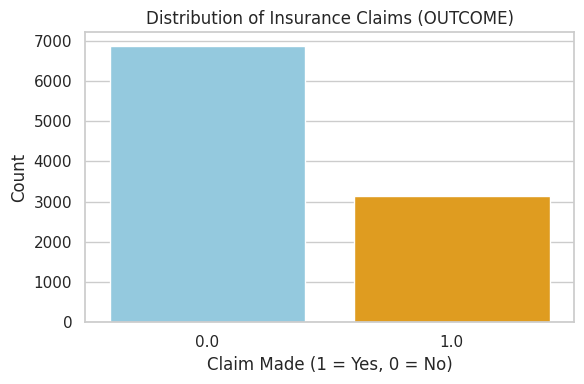

In [10]:
# Claims Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="OUTCOME", data=df, palette=['skyblue', 'orange'])
plt.title("Distribution of Insurance Claims (OUTCOME)")
plt.xlabel("Claim Made (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


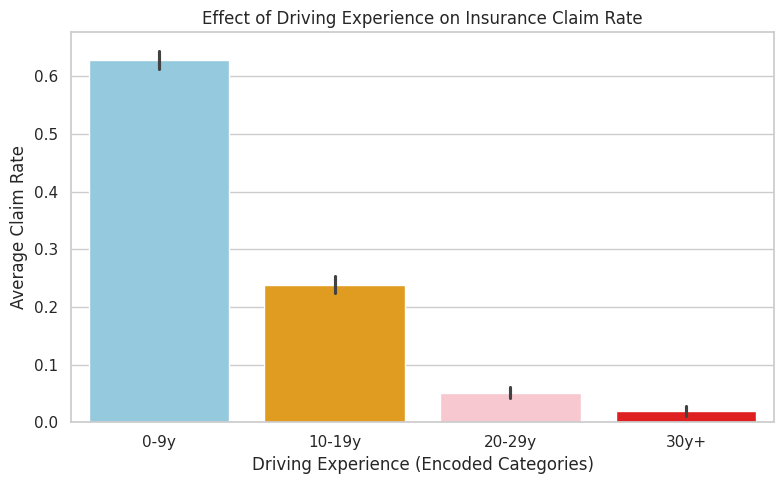

In [11]:
# Driving Experience vs OUTCOME
plt.figure(figsize=(8, 5))
sns.barplot(x="DRIVING_EXPERIENCE", y="OUTCOME", data=df, palette=['skyblue', 'orange','pink', 'red'])
plt.title("Effect of Driving Experience on Insurance Claim Rate")
plt.xlabel("Driving Experience (Encoded Categories)")
plt.ylabel("Average Claim Rate")
plt.tight_layout()
plt.show()

`Driving Experience`
- People with less driving experience (like 0–9 years) are more
 likely to file insurance claims than experienced drivers.

- This shows that new or less skilled drivers are at a higher risk of accidents.


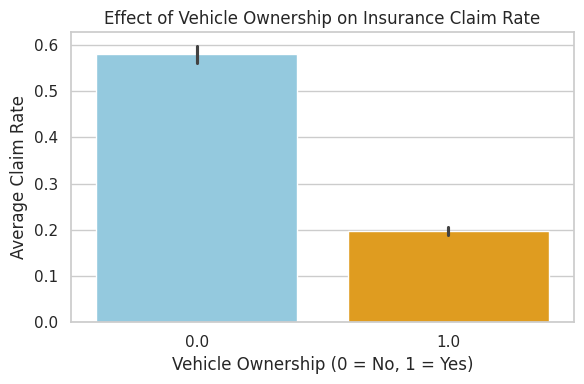

In [12]:
# Vehicle Ownership vs OUTCOME
plt.figure(figsize=(6, 4))
sns.barplot(x="VEHICLE_OWNERSHIP", y="OUTCOME", data=df, palette=['skyblue', 'orange'])
plt.title("Effect of Vehicle Ownership on Insurance Claim Rate")
plt.xlabel("Vehicle Ownership (0 = No, 1 = Yes)")
plt.ylabel("Average Claim Rate")
plt.tight_layout()
plt.show()

`Vehicle Ownership`

- People who do not own the car they drive (value = 0) are more likely to make claims than car owners.

- This may be because they feel less responsible for the car or don't drive it regularly.

#Part_2

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

In [14]:
# Standardize features for PCA and clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 1. Apply PCA (3 components)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [16]:
# 2. Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

In [17]:
# 3. Combine original + PCA + clusters
X_train_enhanced = np.concatenate([X_train.values, X_train_pca, train_clusters.reshape(-1, 1)], axis=1)
X_test_enhanced = np.concatenate([X_test.values, X_test_pca, test_clusters.reshape(-1, 1)], axis=1)

In [18]:
# 4. Train model with engineered features
enhanced_model = RandomForestClassifier(random_state=42)
enhanced_model.fit(X_train_enhanced, y_train)
enhanced_pred = enhanced_model.predict(X_test_enhanced)
enhanced_report = classification_report(y_test, enhanced_pred, output_dict=True)

In [19]:
# 5. Apply feature selection
selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train_enhanced, y_train)
X_train_selected = selector.transform(X_train_enhanced)
X_test_selected = selector.transform(X_test_enhanced)

`Are there any new features in the top 10?`


Yes — the top 10 features in Part 2 include new features that were not in the original model, like PCA components and cluster labels.
These new features helped the model do a better job because they added extra useful information made from the original data.
This shows that feature engineering is helpful for making the model more accurate and easier to understand.


#Part_3